In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as LA
import math
import matplotlib.pyplot as plt
import seaborn as sns

## QUESTION 1

In [2]:
def multi_linreg(X,Y):
    column_1 = np.ones((X.shape[0], 1))
    combined = np.c_[column_1, X]
    a=  combined.T.dot(combined)
    b= combined.T.dot(Y)
    B_hat = np.linalg.solve(a,b)
    return B_hat

## QUESTION 2

In [5]:
life = pd.read_csv('life_expectancy.csv')
life['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [6]:
#Cleaning the data:
life.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
life_cleaned = life[life["Life expectancy "].notnull()]
life_cleaned.shape

(2928, 22)

In [10]:
life_cleaned.dropna(inplace = True)
life_cleaned.shape

C:\Users\Joon Park\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(1649, 22)

In [27]:
life_cleaned['new_status'] = life_cleaned.Status.map(dict(Developing=1, Developed=0))
#1 is Developing, 0 is Developed

C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_1384/1466130615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_cleaned['new_status'] = life_cleaned.Status.map(dict(Developing=1, Developed=0))


In [28]:
life_cleaned

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,new_status
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,1
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,1
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,1
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,1


In [29]:
Xs = life_cleaned[['new_status','Year',' BMI ']].to_numpy()
Ys = life_cleaned['Life expectancy '].to_numpy()

In [30]:
Xs

array([[1.000e+00, 2.015e+03, 1.910e+01],
       [1.000e+00, 2.014e+03, 1.860e+01],
       [1.000e+00, 2.013e+03, 1.810e+01],
       ...,
       [1.000e+00, 2.002e+03, 2.630e+01],
       [1.000e+00, 2.001e+03, 2.590e+01],
       [1.000e+00, 2.000e+03, 2.550e+01]])

In [31]:
Ys

array([65. , 59.9, 59.9, ..., 44.8, 45.3, 46. ])

In [32]:
multi_linreg(Xs,Ys)

array([-1.85825371e+02, -7.72514002e+00,  1.26552001e-01,  1.99925200e-01])

B0 (Y-Int): -185.825371 <br>
B1 (Status): -7.72514002 <br>
B2 (Year): 0.126552001 <br>
B3 (BMI): 0.199925200

## 2b

B0: This is the y intercept. When new_status, year, and BMI is equal to 0, B0 is the hypothetical life expectancy. It is important to note that this is not meaningful as the person's life expectancy cannot be negative

B1: This is the slope for the 'status' variable; when the country is developing (i.e. when status =1), a person's life expectancy decreases by around 8 years.

B2: This is the slope for the Year variable; as year increase by 1, a person's life expectancy increase by 1.26 years. 

B3: This is the slope for the BMI variable; as the BMI increase by 1, the person's life expectancy increase by 0.2.

## 2c

In [33]:
Xs = life_cleaned[['new_status','Year']].to_numpy()
Ys = life_cleaned['Life expectancy '].to_numpy()
multi_linreg(Xs,Ys)

array([-2.06285869e+02, -1.10603504e+01,  1.41956173e-01])

In [34]:
life_cleaned['Year'].max()

2015

C:\Users\Joon Park\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Joon Park\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


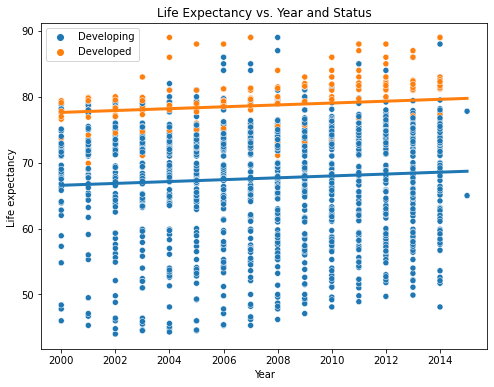

In [35]:
b0 = -206.285869
b1 = -11.0603504
b2 = 0.141956173
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x = "Year" , y = "Life expectancy ", hue = "Status", data = life_cleaned)
x = np.array([2000,2015])
sns.lineplot(x, b0 + b2 * x, lw = 3, color = sns.color_palette()[1])
sns.lineplot(x, b0 + b1 + b2 * x, lw = 3, color = sns.color_palette()[0])
plt.title("Life Expectancy vs. Year and Status")
plt.show()

## 2d

In [36]:
life_cleaned

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,new_status
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,1
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,1
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,1
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,1


In [37]:
life_cleaned['predicted_Y'] = life_cleaned['new_status'].mul(b1).add(life_cleaned['Year'].mul(b2)).add(b0) 

C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_1384/1379577227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_cleaned['predicted_Y'] = life_cleaned['new_status'].mul(b1).add(life_cleaned['Year'].mul(b2)).add(b0)


In [38]:
life_cleaned['epsilon'] = life_cleaned['predicted_Y'].sub(life_cleaned['Life expectancy '])
life_cleaned.head(5)

C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_1384/1456064717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_cleaned['epsilon'] = life_cleaned['predicted_Y'].sub(life_cleaned['Life expectancy '])


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,new_status,predicted_Y,epsilon
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,68.695469,3.695469
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,68.553513,8.653513
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,68.411557,8.511557
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,68.269601,8.769601
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,68.127645,8.927645


R^2 for the 2 variable one:

In [39]:
1 - life_cleaned['epsilon'].var(ddof=0)/life_cleaned['Life expectancy '].var(ddof=0) 

0.20041589240649138

R^2 for the 3 variable:
<br><br>
['new_status','Year',' BMI '] <br>
<br>
[-1.85825371e+02, -7.72514002e+00,  1.26552001e-01,  1.99925200e-01]

In [40]:
b01 = -185.825371
b11 = -7.72514002
b21 = 0.126552001
b31 = 0.199925200

In [27]:
life_cleaned['predicted_Y1'] = life_cleaned['new_status'].mul(b11).add(life_cleaned['Year'].mul(b21)).add(life_cleaned[' BMI '].mul(b31)).add(b01)
life_cleaned['epsilon1'] = life_cleaned['predicted_Y1'].sub(life_cleaned['Life expectancy '])
1 - life_cleaned['epsilon1'].var(ddof=0)/life_cleaned['Life expectancy '].var(ddof=0) 

C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_8196/290608150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_cleaned['predicted_Y1'] = life_cleaned['new_status'].mul(b11).add(life_cleaned['Year'].mul(b21)).add(life_cleaned[' BMI '].mul(b31)).add(b01)
C:\Users\JOONPA~1\AppData\Local\Temp/ipykernel_8196/290608150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_cleaned['epsilon1'] = life_cleaned['predicted_Y1'].sub(life_cleaned['Life expectancy '])


0.3839792945187862

The R^2 value of the linear regression with 3 variables, status, Year and BMI had a higher value compared to that of the regression with 2 variable. This is because adding another variable will decrease the variance of the error term ɛ. This, in turn, will decrease the proportion of unexplained variance in y and therefore when we take 1 - the proportion, the R^2 value will be higher in comparison to having 2 variables.